# Midterm Skills Exam

|name| course/section| date of performance| date submitted|
|---|---|---|---|
| John Edward Binay | CPE 019-32S2 | 2022/02/23 | 2022/02/23 |

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [44]:
# load the and show the original dataset
spam_df = pd.read_csv(r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 019\spam.csv")
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [45]:
# drop the last three columns and rename the first two
spam_df = spam_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
spam_df.columns = ['Category', 'Message']
spam_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
# Show the shape of the dataset
spam_df.shape

(5572, 2)

In [47]:
spam_df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

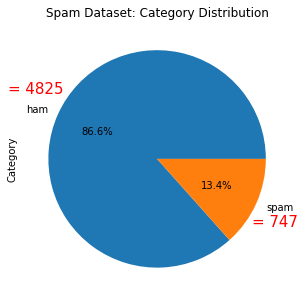

In [48]:
# Show the distribution of the total data in terms of a pie plot
spam_df.Category.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5))
plt.title('Spam Dataset: Category Distribution')
plt.annotate('= 747', xy=(0.2, 0.2), xytext=(0.85, 0.25), xycoords='axes fraction', fontsize=15, color='red');
plt.annotate('= 4825', xy=(0.2, 0.2), xytext=(-0.05, 0.74), xycoords='axes fraction', fontsize=15, color='red');

In [50]:
# Label Spam as 1 and Ham as 0 (you can use the function loc on this)
spam_df_v2 = spam_df.copy()
spam_df_v2 = pd.get_dummies(spam_df_v2['Category'], prefix='Category')
spam_df_v2.columns = ['ham', 'spam']
spam_df_v2.head()


,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [52]:
spam_df.shape

(5572, 2)

In [69]:
# Build the x and y values
X = spam_df["Message"]

# create a new column that represents the category as binary (1 == spam & 0 == ham)
spam_df["ordinal_category"] = spam_df["Category"].apply(lambda x: 1 if x == "spam" else 0)

In [70]:
spam_df

,Category,Message,ordinal_category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will �_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [75]:
y = spam_df["ordinal_category"]

In [76]:
# split the X and y features into training and testing dataset and
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [77]:
# Print the shape of all data (entire data, train data, test data for both x and y)
print("shape of entire data is {}".format(spam_df.shape))
print("shape of training data is {}".format(X_train.shape))
print("shape of test data is {}".format(X_test.shape))

shape of entire data is (5572, 3)
shape of training data is (4457,)
shape of test data is (1115,)


In [78]:
# Use feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
extractor = TfidfVectorizer(stop_words='english', min_df=1, lowercase = True)

In [79]:
X_train_features = extractor.fit_transform(X_train)
X_test_features = extractor.transform(X_test)

In [80]:
# convert object type to int
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [83]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X_train_features, y_train)

LinearSVC()

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
y_train_prediction = LSVC.predict(X_train_features)
print("the accuracy score for the train dataset is {}".format(accuracy_score(y_train, y_train_prediction)))

the accuracy score for the train dataset is 0.9997756338344178


In [85]:
y_test_prediction = LSVC.predict(X_test_features)
print("the accuracy score for the test dataset is {}".format(accuracy_score(y_test, y_test_prediction)))

the accuracy score for the test dataset is 0.979372197309417


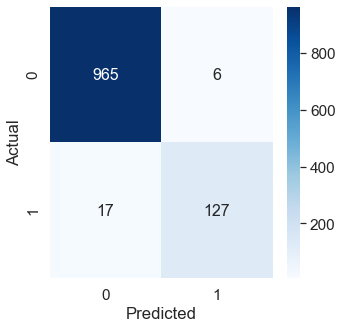

In [97]:
data = confusion_matrix(y_test, y_test_prediction)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_prediction), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt = 'd');

In [90]:
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       971
           1       0.95      0.88      0.92       144

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Since there was more ham than there we spam, the dataset is imbalanced. As such we can expect the model to have a higher recell and precision score when predicting ham than spam. Our confusion matrix supports this. The accuracy score for the model for both when the training and testing data was used were above 98% which is a good enough. Looking at the condusion matrix, the recall for the spam is lower than for ham, and the same goes for its precision. This might be a bit problematic since since the if the model were to be used to automatically segregate your emails, your email services might let in some spam in your inbox. In the case of ham, for every 56-57 non-spam messages, you might expect about 1 spam on the average to end up in the inbox folder, which is not a deal breaker for me. On the other hand, for every 21 messages that the model segregates into the spam folder, for example, you could reasonable expect about 1 non-spam to be sent to the spam folder, which might be a deal breaker for some. 

Now we will predict some spam messages that google's gmail has segregated and see if our model can detect it as spam, too. Before we do that we need to retrain our entire model again to include ALL of our data points so our model can benefit from more data points.

In [98]:
X = spam_df["Message"]
y = spam_df["ordinal_category"]
X_features = extractor.fit_transform(X)

In [99]:
LSVC = LinearSVC()
LSVC.fit(X_features, y)

LinearSVC()

In [100]:
# spam_sample 1
null = ["WINNER!! As a valued network customer, you have been selected to receive a £900 prize. To claim your prize, call 08712 300 989 from landline. Claim code WNR157. Valid 12hrs only."]
null_processed = extractor.transform(null)
prediction = LSVC.predict(null_processed)
print(prediction)

[1]


In [101]:
# ham_sample 1
null = ["Good day, ma'am Alonica. I am writing this letter to let you know that I will not be attending today's class. I have been advised that I am unable to attend the class due to a medical condition. I am very sorry for the inconvenience. I would like to ask you to kindly excuse me from the class. I would also like to thank you for your support. I look forward to seeing you again soon."]
null_processed = extractor.transform(null)
prediction = LSVC.predict(null_processed)
print(prediction)

[0]


In [108]:
null = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr..."]
null_processed = extractor.transform(null)
prediction = LSVC.predict(null_processed)
print(prediction)

[1]


In [109]:
null = ["Can you please get eh goceries inside th ehouse?"]
null_processed = extractor.transform(null)
prediction = LSVC.predict(null_processed)
print(prediction)

[0]


I tried feeding the model using spam emails from mg gmail account, but it seems the model performed poorly trying to segregate my emails. I think is model is better suited to segregate spam messages that people receive in their phones vis SMS. 